#Data 08: Wine

*  포르투갈 비노 베르데(Vinho Verde) 지역의 레드와 화이트 와인의 데이터가 들어있는 데이터 셋이다.  
1980년대까지는 주로 스파클링 레드 와인이 생산되다가,  이후 상황이 역전되어 현재는 모든 비노 베르데의 85% 정도가 화이트 와인이다.
*   Data from: [Cortez et al., 2009](https://archive.ics.uci.edu/ml/datasets/wine+quality)

##1.데이터 둘러보기

In [1]:
#한글 폰트 설정하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
#런타임 다시 시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,971 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160837 files and d

In [1]:
#기본 패키지 불러오기
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

plt.style.use('seaborn')
sns.set(font_scale=1)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#구글 드라이브 마운트하기(이미 되어있다면 건너뛴다)
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
#데이터 불러오기
#드라이브에 올려준 csv 데이터 파일 불러오기
red = pd.read_csv('/content/drive/MyDrive/Python/08_Wine/winequality-red.csv', sep=';')
white = pd.read_csv('/content/drive/MyDrive/Python/08_Wine/winequality-white.csv', sep=';') 
#콤마가 아닌 경우 구분자를 넣어줘야 한다!

In [11]:
#불러온 데이터 일단 보기
white.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


<컬럼 설명>   
* fixed acidity: 결합산
* volatile acidity: 휘발성 산
* citric acid: 시트르산
* redisual sugar: 잔당 
* chlorides: 염화물
* free sulfur dioxide: 유리 이산화황
* total sulfur dioxide: 이산화황
* density: 비중  
* pH: 산도
* sulphates: 황 
* alcohol: 알콜 도수
* quality: 품질(0 ~ 10 사이의 값)

In [8]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [12]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##2.데이터를 보고 질문 만들기

* 와인의 어떤 특성이 와인 퀄리티와 가장 밀접한 관련이 있을까? 
* 와인 퀄리티를 예측하는 모델을 만들어보자.

##3.데이터 정비하기

###3-1. 데이터 합치기

In [13]:
#데이터를 합치기 전에 구분자 컬럼 넣어주기
red['tag'] = 'r'
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,r
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,r
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,r
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,r


In [14]:
#데이터를 합치기 전에 구분자 컬럼 넣어주기
white['tag'] = 'w'
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,w
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,w
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,w
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,w
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,w
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,w
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,w


In [15]:
#두개의 와인 데이터셋을 위아래로 합치기
wine = pd.concat([red, white])
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,r
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,r
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,r
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,w
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,w
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,w
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,w


In [17]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  tag                   6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB


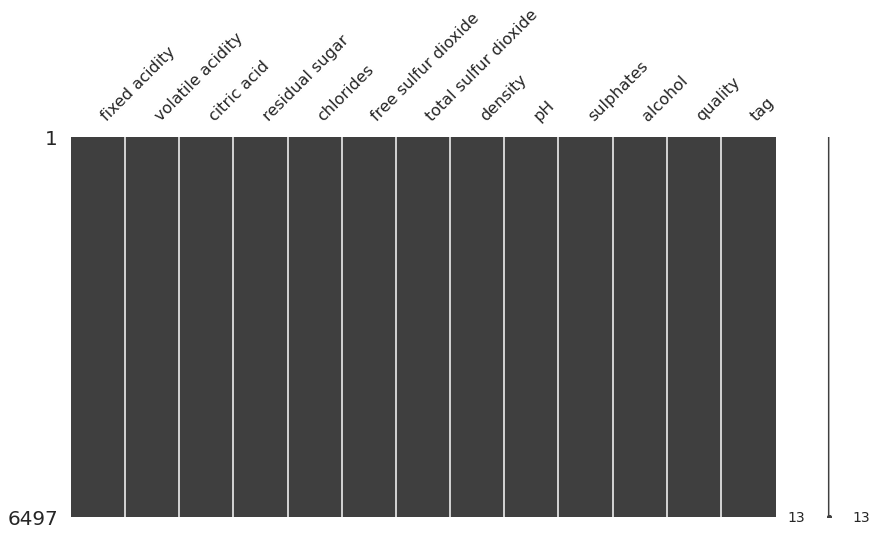

In [18]:
#결측치를 간단하게 시각화 해주는 패키지 
import missingno
missingno.matrix(wine, figsize =(14,7))

##4.EDA & Visualization

###4-1. 퀄리티 체크

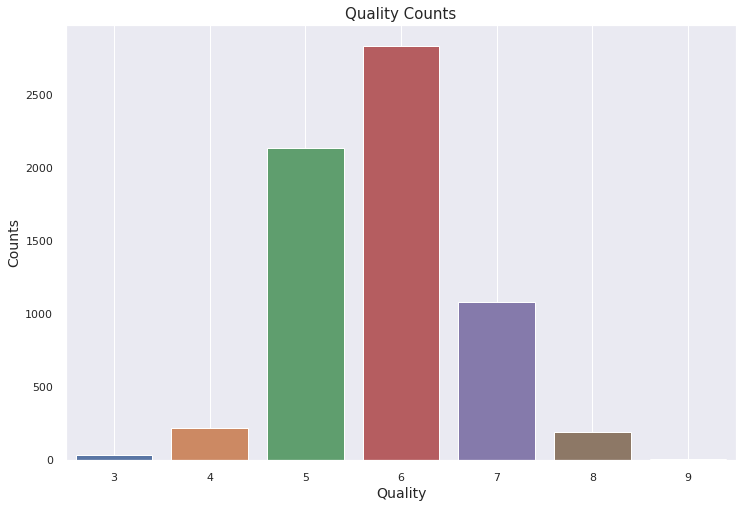

In [20]:
#합친 Wine set에 대해서 각 퀄리티 점수 당 몇 개의 와인이 있는지 확인해보자
plt.figure(figsize=(12,8))
sns.countplot(data = wine ,x='quality')

plt.title("Quality Counts", fontsize=15)
plt.xlabel("Quality", fontsize=14)
plt.ylabel("Counts", fontsize=14)

plt.grid()

In [21]:
#red/white를 나눠서 그려보자
tag1 = wine.groupby(['tag'])['quality'].value_counts().unstack(0)
tag1

tag,r,w
quality,,
3,10.0,20.0
4,53.0,163.0
5,681.0,1457.0
6,638.0,2198.0
7,199.0,880.0
8,18.0,175.0
9,NaN,5.0


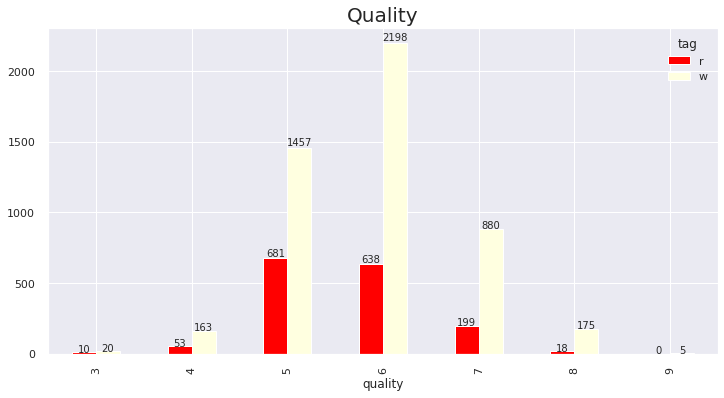

In [27]:
#red/white 와인의 quality 분포는?
ax = tag1.plot(kind='bar', color=['red', 'lightyellow'] ,figsize = (12,6))

ax.set_title('Quality', size=20)

#막대 그래프 위에 값 주기
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds #해당 막대그래프의 정보: 왼쪽, 아래, 막대그래프의 폭, 높이 정보
    ax.annotate("%.0f"%(height), (left+width/2, height*1.01), ha='center')

###4-2. 각 컬럼 데이터의 분포 확인

In [28]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  tag                   6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 870.6+ KB


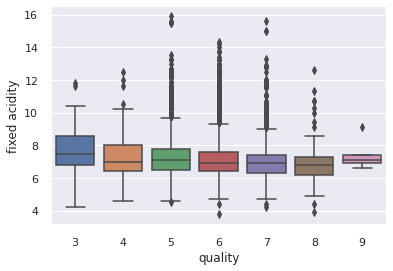

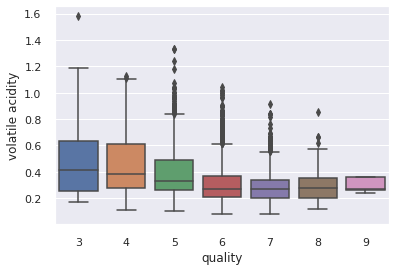

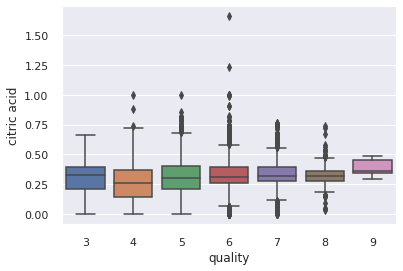

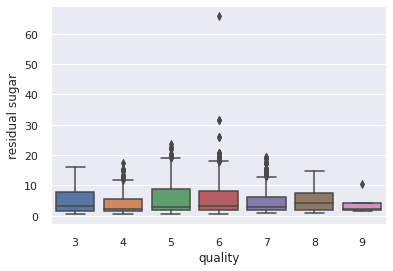

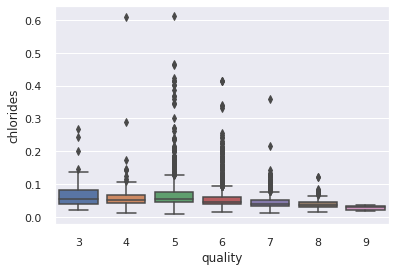

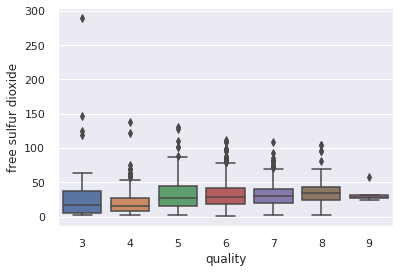

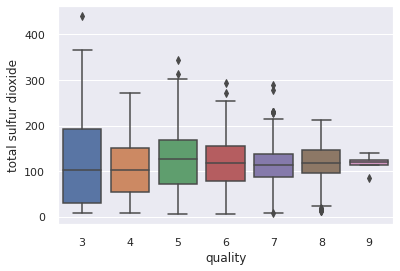

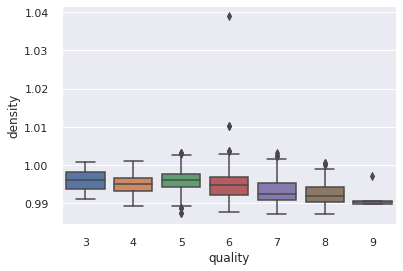

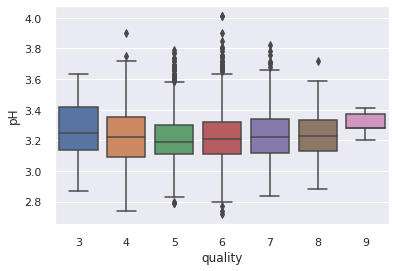

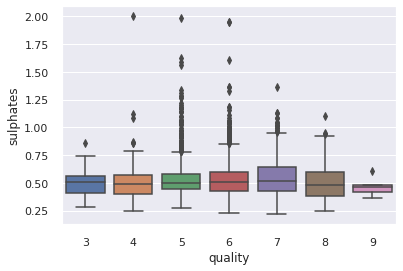

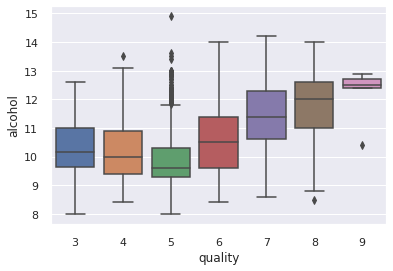

In [29]:
#plot을 한번에 하나씩 그릴수도 있지만... 같은 plot을 그린다면 여러개를 한번에 그리자
#퀄리티에 따라서 각 컬럼의 값이 어떻게 변하는가?

#bot plot
for i in wine.columns:
    if i =="quality":
        break
    sns.boxplot('quality', i, data=wine)
    plt.show()

#음의 상관관계: volatile acidity, chlorides
#양의 상관관계: citric acid, alcohol

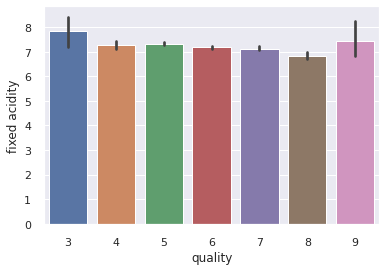

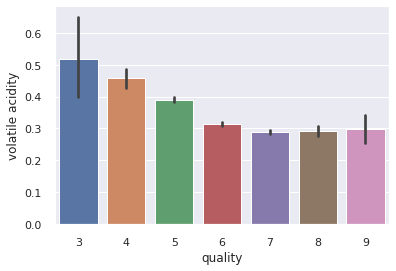

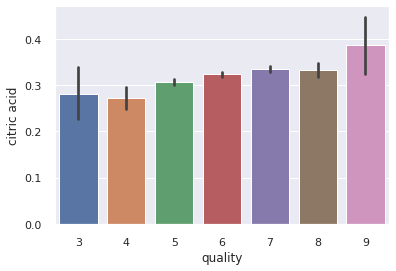

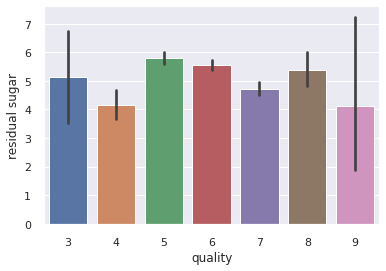

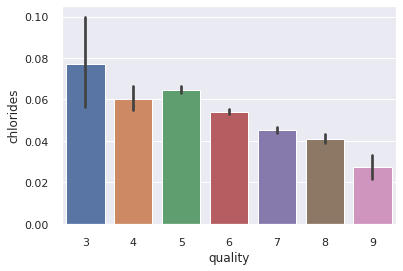

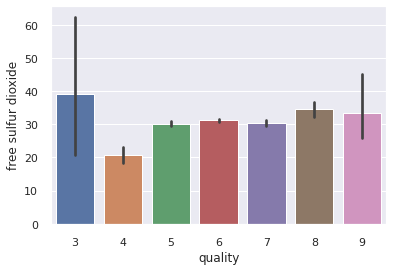

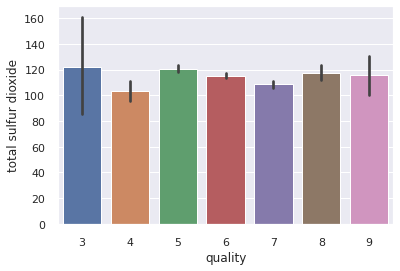

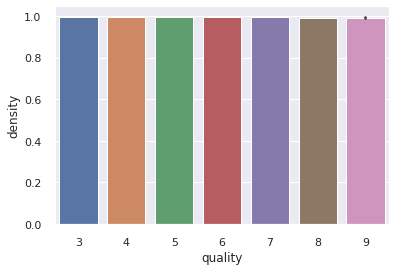

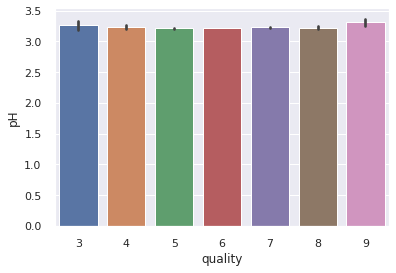

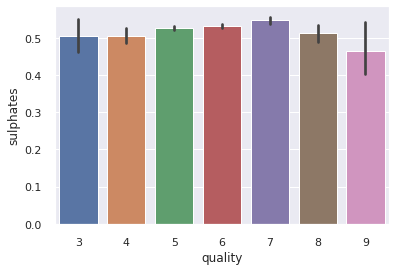

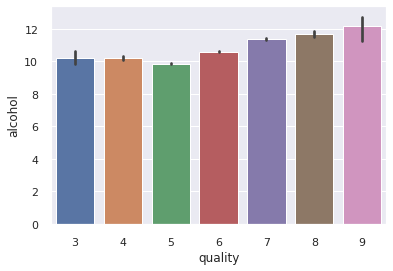

In [31]:
#plot을 한번에 하나씩 그릴수도 있지만... 같은 plot을 그린다면 여러개를 한번에 그리자
#퀄리티에 따라서 각 컬럼의 값이 어떻게 변하는가?

#bar plot
for i in wine.columns:
    if i =="quality":
        break
    sns.barplot('quality',i,data=wine)
    plt.show()

#음의 상관관계: volatile acidity, chlorides
#양의 상관관계: citric acid, alcohol

###4-3. 상관관계 확인하기

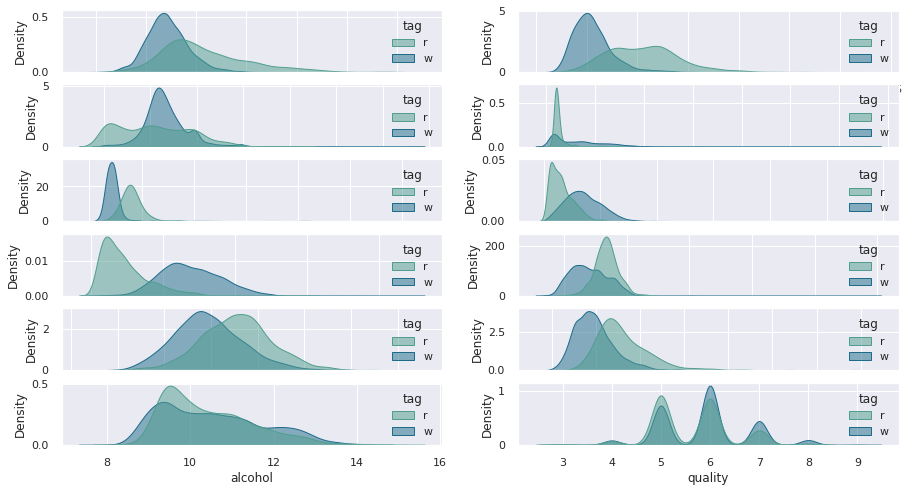

In [32]:
#연속형 변수의 분포 확인하기
f, ax = plt.subplots(6, 2, figsize=(15, 8))

sns.kdeplot(data=wine, x='fixed acidity', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[0,0])
sns.kdeplot(data=wine, x='volatile acidity', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[0,1])
sns.kdeplot(data=wine, x='citric acid', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[1,0])
sns.kdeplot(data=wine, x='residual sugar', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[1,1])
sns.kdeplot(data=wine, x='chlorides', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[2,0])
sns.kdeplot(data=wine, x='free sulfur dioxide', fill=True, common_norm=False, palette='crest',alpha=.5, hue='tag', ax=ax[2,1])
sns.kdeplot(data=wine, x='total sulfur dioxide', fill=True, common_norm=False, palette='crest',alpha=.5, hue='tag', ax=ax[3,0])
sns.kdeplot(data=wine, x='density', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[3,1])
sns.kdeplot(data=wine, x='pH', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[4,0])
sns.kdeplot(data=wine, x='sulphates', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[4,1])
sns.kdeplot(data=wine, x='alcohol', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[5,0])
sns.kdeplot(data=wine, x='quality', hue='tag', fill=True, common_norm=False, palette='crest',alpha=.5, ax=ax[5,1])

plt.show()

Text(0.5, 1.0, 'Correlation map for Wine Data')

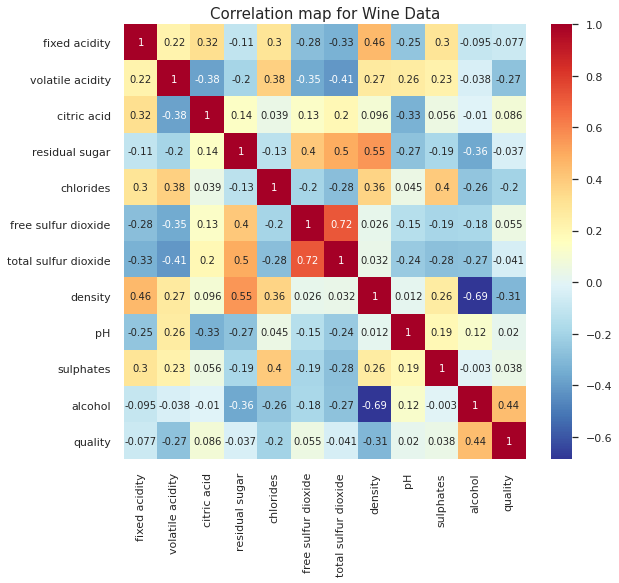

In [33]:
#컬럼 간 상관관계를 heatmap으로 확인하자
f, ax = plt.subplots(1, 1, figsize=(9, 8))

corrmat = wine.corr()
sns.heatmap(corrmat, annot=True, cmap='RdYlBu_r', ax=ax)
plt.title('Correlation map for Wine Data', size=15)

##5.와인 퀄리티 예측하기 

###5-1. 모델링하기 전 전처리하기

In [34]:
#와인 퀄리티 단순화 하기
# 3 ~ 6점 까지는 나쁜 와인 = 0, 7 이상은 좋은 와인 = 1
reviews = []
for score in wine['quality']:
    if score >= 3 and score < 7:
        reviews.append(0)
    else:
        reviews.append(1)

wine['good'] = reviews

In [35]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0


In [36]:
wine.groupby(['tag', 'good'])['good'].agg(['count'])

count
tag good       
r   0      1382
    1       217
w   0      3838
    1      1060

In [37]:
#레드와인과 화이트와인을 나눠서 모델링한 후 비교해보자
rw = wine[wine.tag=='r']
ww = wine[wine.tag=='w']

In [38]:
#패키지 불러오기
import os

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [40]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,tag,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,r,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,r,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,r,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,r,0


In [41]:
#good 컬럼이 타겟변수, 나머지 컬럼이 설명변수가 된다
#total
Xt = wine.iloc[:,:-3]
yt = wine['good']

#red
Xr = rw.iloc[:,:-3]
yr = rw['good']

#white
Xw = ww.iloc[:,:-3]
yw = ww['good']

In [42]:
#Train 데이터와 Test 데이터 나누기
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state = 42) #total
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size = 0.2, random_state = 42) #red
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size = 0.2, random_state = 42) #white

In [43]:
#각 컬럼의 값들이 정규분포를 가지도록 scaling 해 주는 과정
scaler = StandardScaler()

#total
Xt_train = scaler.fit_transform(Xt_train)
Xt_test = scaler.fit_transform(Xt_test)

#red
Xr_train = scaler.fit_transform(Xr_train)
Xr_test = scaler.fit_transform(Xr_test)

#white
Xw_train = scaler.fit_transform(Xw_train)
Xw_test = scaler.fit_transform(Xw_test)

###5-2. Logistic Regression

In [44]:
#total
logt = LogisticRegression()
logt.fit(Xt_train, yt_train)
pred_logt = logt.predict(Xt_test)

#red
logr = LogisticRegression()
logr.fit(Xr_train, yr_train)
pred_logr = logt.predict(Xr_test)

#white
logw = LogisticRegression()
logw.fit(Xw_train, yw_train)
pred_logw = logt.predict(Xw_test)

In [48]:
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_logt,yt_test), accuracy_score(pred_logr,yr_test), accuracy_score(pred_logw,yw_test)))

print("classification Report:\n",classification_report(pred_logt,yt_test))
print("confusion Matrix:\n",confusion_matrix(pred_logt,yt_test))

Accuracy Score: 
Total: 0.83, Red: 0.81, White: 0.79
classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90      1190
           1       0.28      0.64      0.39       110

    accuracy                           0.83      1300
   macro avg       0.62      0.74      0.64      1300
weighted avg       0.90      0.83      0.86      1300

confusion Matrix:
 [[1008  182]
 [  40   70]]


###5-3. Support Vector Machine(SVM)

In [49]:
#total
svct = SVC()
svct.fit(Xt_train, yt_train)
pred_svct = svct.predict(Xt_test)

#red
svcr = SVC()
svcr.fit(Xr_train, yr_train)
pred_svcr = svcr.predict(Xr_test)

#white
svcw = SVC()
svcw.fit(Xw_train, yw_train)
pred_svcw = svcw.predict(Xw_test)

In [50]:
#결과 출력하기
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_svct,yt_test), accuracy_score(pred_svcr,yr_test), accuracy_score(pred_svcw,yw_test)))

#print("classification Report:\n",classification_report(pred_svc,y_test))
#print("confusion Matrix:\n",confusion_matrix(pred_svc,y_test))

Accuracy Score: 
Total: 0.84, Red: 0.88, White: 0.82


###5-4. Random Forest Classifier 

In [51]:
#total
rfct = RandomForestClassifier()
rfct.fit(Xt_train, yt_train)
pred_rfct = rfct.predict(Xt_test)

#red
rfcr = RandomForestClassifier()
rfcr.fit(Xr_train, yr_train)
pred_rfcr = rfcr.predict(Xr_test)

#white
rfcw = RandomForestClassifier()
rfcw.fit(Xw_train, yw_train)
pred_rfcw = rfcw.predict(Xw_test)

In [52]:
#결과 출력하기
print("Accuracy Score: ")
print("Total: {:.2f}, Red: {:.2f}, White: {:.2f}".format(accuracy_score(pred_rfct,yt_test), accuracy_score(pred_rfcr,yr_test), accuracy_score(pred_rfcw,yw_test)))

#print("classification Report:\n",classification_report(pred_rfc,y_test))
#print("confusion Matrix:\n",confusion_matrix(pred_rfc,y_test))

Accuracy Score: 
Total: 0.88, Red: 0.88, White: 0.88


###5-5. 모델링 결과 그래프로 나타내기

In [53]:
#total, red, white의 결과를 한데 모으자
rest = [accuracy_score(pred_logt,yt_test), accuracy_score(pred_svct,yt_test), accuracy_score(pred_rfct,yt_test)]
resr = [accuracy_score(pred_logr,yr_test), accuracy_score(pred_svcr,yr_test), accuracy_score(pred_rfcr,yr_test)]
resw = [accuracy_score(pred_logw,yw_test), accuracy_score(pred_svcw,yw_test), accuracy_score(pred_rfcw,yw_test)]

In [54]:
df = pd.DataFrame(np.c_[rest,resr,resw], columns=['Total', 'Red', 'White'], index=['Log', 'SVC', 'RFC'])
df

,Total,Red,White
Log,0.829231,0.812500,0.787755
SVC,0.836923,0.875000,0.820408
RFC,0.880769,0.884375,0.879592


Text(0, 0.5, 'Accuracy')

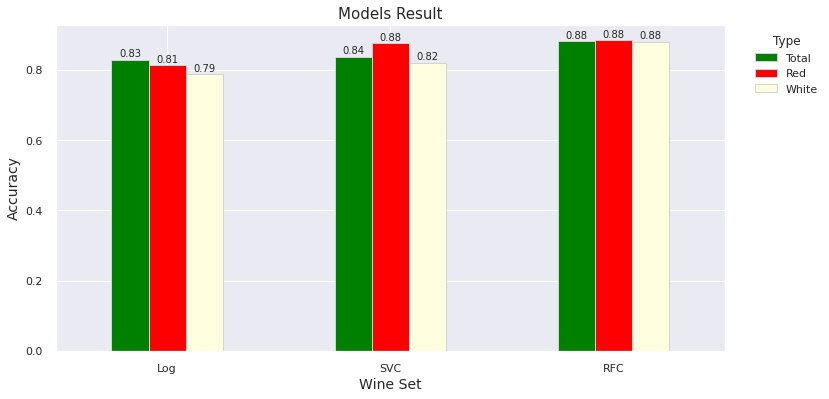

In [56]:
ax = df.plot(kind='bar', color = ['green', 'red', 'lightyellow'], edgecolor='lightgray' ,figsize = (12,6))

ax.set_title('Wine Modeling Result')
ax.set_xticklabels(['Log', 'SVC', 'RFC'], rotation=0)
ax.legend(title='Type', bbox_to_anchor= (1.03, 1))

#막대 그래프 위에 값 주기
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds #해당 막대그래프의 정보: 왼쪽, 아래, 막대그래프의 폭, 높이 정보
    ax.annotate("%.2f"%(height), (left+width/2, height*1.01), ha='center')

plt.title("Models Result", fontsize=15)
plt.xlabel("Wine Set", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

##6.Review

* 와인의 어떤 특성이 와인 퀄리티와 가장 밀접한 관련이 있을까? 
> Correlation 분석을 통해 확인
* 와인 퀄리티를 예측하는 모델을 만들어보자.
> 레드/화이트 와인을 나누어서 분석해본 결과와 합친 결과를 비교해보았다.
모델별로 분석 셋에 대한 결과가 달랐으나, 종합적으로 RFC를 사용했을 때 예측 성능이 가장 뛰어났다.